# Part II - Prosper Loan Data Exploration
## by Adaobi Muoemenam


## Investigation Overview

My investigation is aimed at these points:

 - Popular loans (amount and categories)
 - How investors choose to finance loans
 - Accuracy of borrower profiling
 
## Dataset Overview
The dataset has information on 113937 loans (rows) which are represented by 81 variables (columns) for each loan.
To answer the questions above, I had to focus on some variables in the dataset which are:<br>
'LoanKey', 'Term','ClosedDate', 'EmploymentStatus', 'Occupation', 'Recommendations', 'LoanStatus', 'BorrowerRate', 'ProsperRating (numeric)',
     'StatedMonthlyIncome', 'TotalProsperLoans', 'LoanOriginalAmount', 'ListingCategory (numeric)',
    'LoanOriginationDate','DelinquenciesLast7Years', 'Investors'

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline
default_color = sb.color_palette()[0]

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe

df_original = pd.read_csv('prosperLoanData.csv')

In [3]:
columns_of_interest =  ['LoanKey', 'Term','ClosedDate', 'EmploymentStatus', 'Occupation', 'Recommendations', 'LoanStatus', 'BorrowerRate', 'ProsperRating (numeric)',
     'StatedMonthlyIncome', 'TotalProsperLoans', 'LoanOriginalAmount', 'ListingCategory (numeric)',
    'LoanOriginationDate','DelinquenciesLast7Years', 'Investors']
# Create a copy of the original dataset before wrangling

df = df_original.copy()
df = df[columns_of_interest]



def change_type(dataFrame, columns = [], dType = 'Str'):
    for col in columns:
        dataFrame[col] = dataFrame[col].astype(dType)

ListingCategory_mapping = {0:'Not Available', 1:'Debt Consolidation', 2:'Home Improvement', 3:'Business', 4:'Personal Loan', 5:'Student Use', 6:'Auto', 7:'Other', 8:'Baby&Adoption', 9:'Boat', 10:'Cosmetic Procedure', 11:'Engagement Ring', 12:'Green Loans', 13:'Household Expenses', 14:'Large Purchases', 15:'Medical/Dental', 16:'Motorcycle', 17:'RV', 18:'Taxes', 19:'Vacation', 20:'Wedding Loans'}

# Convert ProsperRating (numeric) into an ordered categorical type
ordered_var = pd.api.types.CategoricalDtype(ordered = True, categories = [0,1,2,3,4,5,6,7])
df['ProsperRating (numeric)'] = df['ProsperRating (numeric)'].astype(ordered_var)

# Convert ListingCategory (numeric) into comprehensible text
df['ListingCategory (numeric)'] = df['ListingCategory (numeric)'].apply(lambda x: ListingCategory_mapping[x])



# Convert Term, EmploymentStatus, LoanStatus, ListingCategory (numeric) to nominal categories
nom_cat_columns = ['Term', 'EmploymentStatus', 'Occupation', 'LoanStatus', 'ListingCategory (numeric)']

change_type(df, columns = nom_cat_columns, dType = 'category')



# drop duplicate rows
df.drop_duplicates(inplace=True)



# Drop the blanks in ProsperRating (numeric)
df = df.dropna(subset=['ProsperRating (numeric)']).reset_index()


# Fill the blanks in TotalProsperLoans with the mean
mean_TotalProsperLoans = round(df.TotalProsperLoans.mean())
df.Occupation = df.Occupation.fillna('Other')
df.TotalProsperLoans = df.TotalProsperLoans.fillna(mean_TotalProsperLoans)


# Convert TotalProsperLoans, LoanOriginalAmount, DelinquenciesLast7Years to int
nom_cat_columns = ['TotalProsperLoans', 'LoanOriginalAmount', 'DelinquenciesLast7Years']
change_type(df, columns = nom_cat_columns, dType = 'int')

df = df.rename(columns = {'ListingCategory (numeric)' : 'ListingCategory'})



## Distribution of Loan Amounts

Loan amounts that are offered by Prosper take on a wide range.<br>
The lowest loan taken is \\$2,000, while the highest is $35,000 although the new limit on Prosper's Website now is \\$50,000 <br>
The distribution of loan amounts taken shows some loan amounts are quite popular.

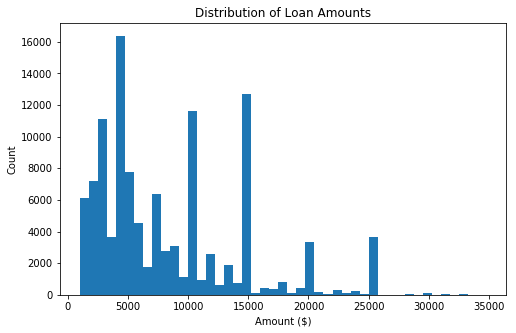

In [4]:
binsize = 500
min_loan,max_loan = df_original['LoanOriginalAmount'].min(),df_original['LoanOriginalAmount'].max()
bins = np.arange(min_loan, max_loan, 750)

plt.figure(figsize=[8, 5])
plt.hist(data = df_original, x = 'LoanOriginalAmount', bins = bins)
plt.title('Distribution of Loan Amounts')
plt.xlabel('Amount ($)')
plt.ylabel('Count')
plt.show();

## Popularity of Loan Categories

This is the category of the listing that the borrower selected when posting their listing: 0 - Not Available, 1 - Debt Consolidation, 2 - Home Improvement, 3 - Business, 4 - Personal Loan, 5 - Student Use, 6 - Auto, 7- Other, 8 - Baby&Adoption, 9 - Boat, 10 - Cosmetic Procedure, 11 - Engagement Ring, 12 - Green Loans, 13 - Household Expenses, 14 - Large Purchases, 15 - Medical/Dental, 16 - Motorcycle, 17 - RV, 18 - Taxes, 19 - Vacation, 20 - Wedding Loans

Debt consolidation is clearly the highest type of loan taken. It accounts for more than all the other loans combined in frequency. This makes sense as people take a debt consolidation to mop up all their existing loans with more favorable payment plans and periods.

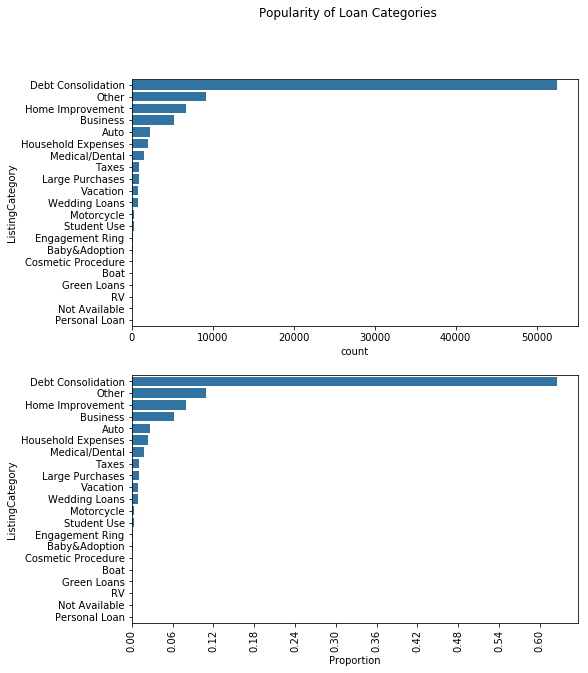

In [5]:
# Let's see how each category fares

fig, ax = plt.subplots(nrows=2, figsize = [8,10])

# get order of bars by frequency
category_counts = df['ListingCategory'].value_counts()
category_order = category_counts.index

# Compute largest proportion
n_category = df['ListingCategory'].value_counts().sum()
max_category_count = category_counts.values[0]
max_prop = max_category_count / n_category

# establish tick locations and create plot
tick_props = np.arange(0, max_prop, 0.06)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

sb.countplot(data = df, y = 'ListingCategory', color = default_color, order = category_order, ax = ax[0])
# ax[0].set_title('Popularity of Loan Categories')
plt.xticks(rotation = 90);

sb.countplot(data = df, y = 'ListingCategory', color = default_color, order = category_order, ax = ax[1])
plt.suptitle('Popularity of Loan Categories')
plt.xticks(tick_props * n_category, tick_names)
plt.xlabel('Proportion')
plt.xticks(rotation = 90);

## Loan Amount vs. Investors

The highest number of investors to fund any loan maxes out a little above 1000 investors.<br>
More investors are willing to fund loans of lesser values

Now, let's take a second look at the loan amount and investors distributions on the three categorical variables: employment status, loan status, and rating.

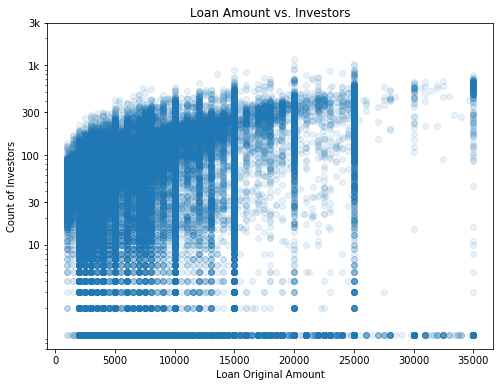

In [6]:
# scatter plot of loan amount vs. investors, with log transform on price axis

plt.figure(figsize = [8, 6])
plt.scatter(data = df, x = 'LoanOriginalAmount', y = 'Investors', alpha = 1/10)
# plt.xlim([0, 3.5])
plt.xlabel('Loan Original Amount')
plt.yscale('log')
plt.yticks([10, 30, 100, 300, 1e3, 3e3], [10, 30, 100, 300, '1k', '3k'])
plt.ylabel('Count of Investors')
plt.title('Loan Amount vs. Investors')
plt.show();

## Listing category vs. Loan status

If an investor wants to concentrate on a particular category of loan type so as to minimize loss, the summary of the ratio of active to inactive loans as seen below will be of help. Generally, all loan categories have higher active loan and the margin is highest for debt consolidation.

In [7]:
# Create a feature to indicate if a loan is active or not

completedStatus = ['Completed','Chargedoff','Cancelled','Defaulted']

df['LoanStatusActive'] = df['LoanStatus'].apply(lambda x: 0 if x in completedStatus else 1)

df.LoanStatusActive = df['LoanStatusActive'].astype('bool')

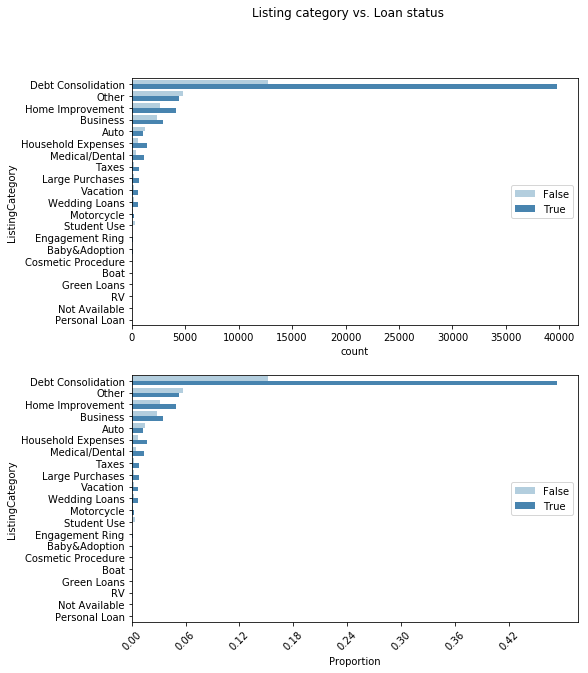

In [8]:
fig, ax = plt.subplots(nrows=2, figsize = [8,10])

# get order of bars by frequency
category_counts = df.groupby('LoanStatusActive').ListingCategory.value_counts()

# Compute largest proportion
# n_category = df['ListingCategory'].value_counts().sum()
max_category_count = category_counts.values.max()
max_prop = max_category_count / n_category

# establish tick locations and create plot
tick_props = np.arange(0, max_prop, 0.06)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

sb.countplot(data = df, y = 'ListingCategory', hue = 'LoanStatusActive', palette = 'Blues',
             order = category_order, ax = ax[0])
plt.xticks(rotation = 45)
ax[0].legend(loc='right');

sb.countplot(data = df, y = 'ListingCategory', hue = 'LoanStatusActive', palette = 'Blues',
             order = category_order, ax = ax[1])
plt.xticks(tick_props * n_category, tick_names)
plt.xlabel('Proportion')
plt.xticks(rotation = 45)
plt.suptitle('Listing category vs. Loan status')
ax[1].legend(loc='right');

## Loan Amount by Loan Status and Ratings

The hierarchy in rating by loan amount is clear when clustered across loan status values. The pattern looks quite systematic.<br>
Borrowers with the highest rating (7) still default on their loans. Although good ratings give access to better loans, caution is advised for investors who consider this as a basis in the decision making process on the safety of the returns on investments.

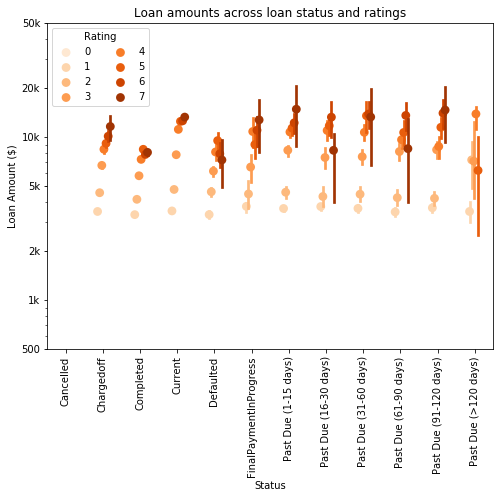

In [9]:
fig = plt.figure(figsize = [8,6])
ax = sb.pointplot(data = df, x = 'LoanStatus', y = 'LoanOriginalAmount', hue = 'ProsperRating (numeric)',
           palette = 'Oranges', linestyles = '', dodge = 0.4)
plt.title('Loan amounts across loan status and ratings')
plt.ylabel('Loan Amount ($)')
plt.xlabel('Status')
plt.yscale('log')
plt.yticks([500, 1e3, 2e3, 5e3, 1e4, 2e4,5e4], [500, '1k', '2k','5k','10k','20k','50k'])
ax.set_yticklabels([],minor = True)
plt.xticks(rotation = 90)
plt.legend(ncol = 2,loc='best',title='Rating')
plt.show();